In [1]:
from google.colab import drive
import os 
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
os.chdir("/content/drive/MyDrive/데이콘/lg")

## Import

In [3]:
import pandas as pd
import random
import os
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.multioutput import MultiOutputRegressor

In [4]:
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
seed_everything(42) # Seed 고정

## Data Load

In [5]:
train_df = pd.read_csv('/content/drive/MyDrive/데이콘/lg/open/train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/데이콘/lg/open/test.csv')

In [6]:
train_x = train_df.filter(regex='X') # Input : X Featrue
train_y = train_df.filter(regex='Y') # Output : Y Feature

In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39607 entries, 0 to 39606
Data columns (total 71 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      39607 non-null  object 
 1   X_01    39607 non-null  float64
 2   X_02    39607 non-null  float64
 3   X_03    39607 non-null  float64
 4   X_04    39607 non-null  int64  
 5   X_05    39607 non-null  float64
 6   X_06    39607 non-null  float64
 7   X_07    39607 non-null  float64
 8   X_08    39607 non-null  float64
 9   X_09    39607 non-null  float64
 10  X_10    39607 non-null  float64
 11  X_11    39607 non-null  float64
 12  X_12    39607 non-null  float64
 13  X_13    39607 non-null  float64
 14  X_14    39607 non-null  float64
 15  X_15    39607 non-null  float64
 16  X_16    39607 non-null  float64
 17  X_17    39607 non-null  float64
 18  X_18    39607 non-null  float64
 19  X_19    39607 non-null  float64
 20  X_20    39607 non-null  float64
 21  X_21    39607 non-null  float64
 22

In [8]:
train_df.describe()

X_01          X_02          X_03     X_04          X_05  \
count  39607.000000  39607.000000  39607.000000  39607.0  39607.000000   
mean      68.412040    103.320166     68.826354      1.0    102.337203   
std        2.655983      0.000372      5.151167      0.0      0.548353   
min       56.268000    103.320000     56.470000      1.0    101.774000   
25%       66.465000    103.320000     65.070000      1.0    101.949000   
50%       68.504000    103.320000     67.270000      1.0    102.006000   
75%       69.524000    103.320000     71.770000      1.0    103.144000   
max       84.820000    103.321000     89.170000      1.0    103.160000   

               X_06          X_07          X_08          X_09          X_10  \
count  39607.000000  39607.000000  39607.000000  39607.000000  39607.000000   
mean      70.597211     29.407490    164.449320    225.397470      0.002449   
std        2.259820      7.338204    220.402444     66.734725      0.086255   
min       61.726000     14.140000     38.460000     37.580000      0.000000   
25%       68.864000     27.890000    105.990000    188.540000      0.000000   
50%       69.884000     28.840000    115.040000    234.450000      0.000000   
75%       71.923000     29.870000    132.620000    263.960000      0.000000   
max       87.219000    163.860000   2387.440000    637.490000      3.600000   

       ...          Y_05          Y_06          Y_07          Y_08  \
count  ...  39607.000000  39607.000000  39607.000000  39607.000000   
mean   ...     31.290467     16.529382      3.155054    -26.294839   
std    ...      2.543222      1.893014      0.418940      0.660537   
min    ...     18.589000    -19.963000      0.502000    -29.652000   
25%    ...     29.768000     16.146000      2.863000    -26.689000   
50%    ...     31.710000     16.694000      3.126000    -26.254000   
75%    ...     33.184000     17.164000      3.433500    -25.855000   
max    ...     37.250000     18.998000      5.299000    -23.785000   

               Y_09          Y_10          Y_11          Y_12          Y_13  \
count  39607.000000  39607.000000  39607.000000  39607.000000  39607.000000   
mean     -26.308623    -22.400062     24.325061    -26.237762    -26.233869   
std        0.653580      0.920952      0.830197      0.656329      0.655090   
min      -29.523000    -31.119000     19.844000    -29.544000    -29.448000   
25%      -26.702000    -22.871000     23.836000    -26.630000    -26.624000   
50%      -26.266000    -22.275000     24.420000    -26.198000    -26.193000   
75%      -25.871000    -21.791000     24.911500    -25.799000    -25.794000   
max      -23.960000    -20.052000     26.703000    -23.722000    -23.899000   

               Y_14  
count  39607.000000  
mean     -26.245868  
std        0.655989  
min      -29.620000  
25%      -26.640000  
50%      -26.204000  
75%      -25.809000  
max      -23.856000  

[8 rows x 70 columns]

In [9]:
train_df.isnull().sum().sum()

0

In [10]:
test_df.isnull().sum().sum()

0

In [11]:
meta = pd.read_csv('/content/drive/MyDrive/데이콘/lg/open/meta/y_feature_spec_info.csv')

In [12]:
meta.head()

Feature    최소    최대
0    Y_01   0.2   2.0
1    Y_02   0.2   2.1
2    Y_03   0.2   2.1
3    Y_04   7.0  19.0
4    Y_05  22.0  36.5

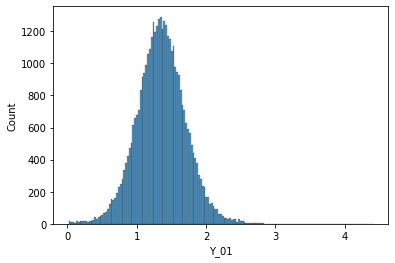

In [13]:
sns.histplot(data=train_df, x='Y_01')

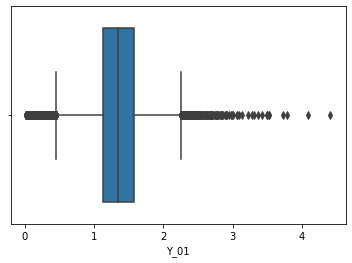

In [14]:
sns.boxplot(data=train_df, x='Y_01')

In [15]:
# col = 'Y_01'

for col in ['Y_' + str(n).zfill(2) for n in range(1, 15) ]:

    min_spec = meta.loc[meta['Feature']==col, '최소'].iloc[0]
    max_spec = meta.loc[meta['Feature']==col, '최대'].iloc[0]


    train_df[f'{col}_cat'] = np.nan
    train_df.loc[(train_df[col]<min_spec) | (train_df[col]>max_spec), f'{col}_cat'] = 1 # 불량
    train_df.loc[~((train_df[col]<min_spec) | (train_df[col]>max_spec)), f'{col}_cat'] = 0  # 정상

train_df.head()

ID    X_01     X_02   X_03  X_04     X_05    X_06   X_07    X_08  \
0  TRAIN_00001  70.544  103.320  67.47     1  101.892  74.983  29.45   62.38   
1  TRAIN_00002  69.524  103.321  65.17     1  101.944  72.943  28.73   61.23   
2  TRAIN_00003  72.583  103.320  64.07     1  103.153  72.943  28.81  105.77   
3  TRAIN_00004  71.563  103.320  67.57     1  101.971  77.022  28.92  115.21   
4  TRAIN_00005  69.524  103.320  63.57     1  101.981  70.904  29.68  103.38   

     X_09  ...  Y_05_cat  Y_06_cat  Y_07_cat  Y_08_cat  Y_09_cat  Y_10_cat  \
0  245.71  ...       0.0       0.0       1.0       0.0       0.0       0.0   
1  233.61  ...       0.0       0.0       0.0       0.0       0.0       0.0   
2  272.20  ...       0.0       0.0       0.0       0.0       0.0       0.0   
3  255.36  ...       0.0       0.0       0.0       0.0       0.0       0.0   
4  241.46  ...       0.0       0.0       0.0       0.0       0.0       0.0   

   Y_11_cat  Y_12_cat  Y_13_cat  Y_14_cat  
0       0.0       0.0       0.0       0.0  
1       0.0       0.0       0.0       0.0  
2       0.0       0.0       0.0       0.0  
3       0.0       0.0       0.0       0.0  
4       0.0       0.0       0.0       0.0  

[5 rows x 85 columns]

In [16]:
(train_df.loc[:, 'Y_01_cat':'Y_14_cat'].mean(axis=1)==0).sum()

35690

In [17]:
(train_df.loc[:, 'Y_01_cat':'Y_14_cat'].mean(axis=1)==1).sum()

0

In [18]:
train_df = train_df.drop(columns=['X_04', 'X_23', 'X_47', 'X_48'])
test_df = test_df.drop(columns=['X_04', 'X_23', 'X_47', 'X_48'])

In [19]:
train_df['Y_cat'] = 0
train_df.loc[(train_df.loc[:, 'Y_01_cat':'Y_14_cat'].mean(axis=1) > 0), 'Y_cat'] =1

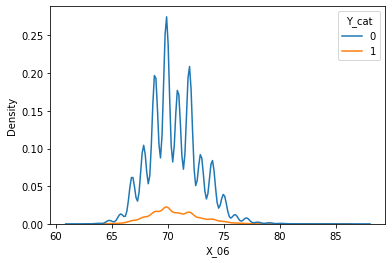

In [20]:
sns.kdeplot(data=train_df, x='X_06', hue='Y_cat')

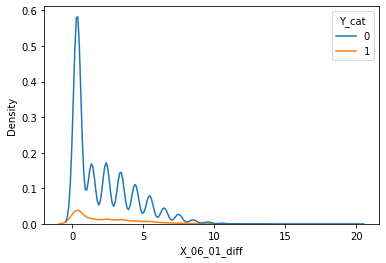

In [ ]:
# 변화율
train_df['X_06_01_diff'] = train_df['X_06'] - train_df['X_01']
sns.kdeplot(data=train_df, x='X_06_01_diff', hue='Y_cat')

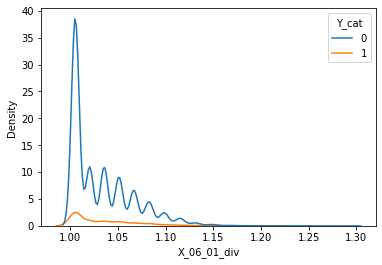

In [ ]:
# 비율
train_df['X_06_01_div'] = train_df['X_06'] / train_df['X_01']
sns.kdeplot(data=train_df, x='X_06_01_div', hue='Y_cat')

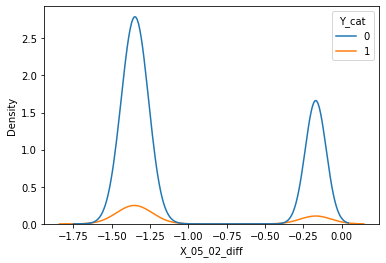

In [ ]:
# 변화율
train_df['X_05_02_diff'] = train_df['X_05'] - train_df['X_02']
sns.kdeplot(data=train_df, x='X_05_02_diff', hue='Y_cat')

In [ ]:
def create_diff(df, col1, col2):
  col_name = col1 + col2[1:] + "_diff"
  df[col_name] = df[col1] - df[col2]

def create_div(df, col1, col2):
  col_name = col1 + col2[1:] + "_div"
  df[col_name] = df[col1] / (df[col2] + 1e-6)


In [ ]:
# 방열재료의 단위면적 당 무게
weight = ['X_'+str(i).zfill(2) for i in [3, 10, 11]]
area = ['X_'+str(i).zfill(2) for i in [7, 8, 9]]

print(weight)
print(area)

['X_03', 'X_10', 'X_11']
['X_07', 'X_08', 'X_09']


In [ ]:
for col1, col2 in zip(weight, area):
  create_div(train_df, col1, col2)


In [ ]:
train_df.head(2)

ID    X_01     X_02   X_03     X_05    X_06   X_07   X_08    X_09  \
0  TRAIN_00001  70.544  103.320  67.47  101.892  74.983  29.45  62.38  245.71   
1  TRAIN_00002  69.524  103.321  65.17  101.944  72.943  28.73  61.23  233.61   

   X_10  ...  X_02_01_div  X_06_01_diff  X_06_01_div  X_05_02_diff  \
0   0.0  ...     1.464618         4.439     1.062925        -1.428   
1   0.0  ...     1.486120         3.419     1.049177        -1.377   

   X_03_07_diff  X_10_08_diff  X_11_09_diff  X_03_07_div  X_10_08_div  \
0      2.291002           0.0           0.0     2.291002          0.0   
1      2.268361           0.0           0.0     2.268361          0.0   

   X_11_09_div  
0          0.0  
1          0.0  

[2 rows x 93 columns]

In [ ]:
# min_spec = meta.loc[meta['Feature']==col, '최소'][0]

In [ ]:
# max_spec = meta.loc[meta['Feature']==col, '최대'][0]

In [ ]:
# # Y_01 불량
# (train_df[col]<min_spec) | (train_df[col]>max_spec)

In [ ]:
# train_df['Y_01_cat'] = np.nan
# train_df.head(2)

ID    X_01     X_02   X_03  X_04     X_05    X_06   X_07   X_08  \
0  TRAIN_00001  70.544  103.320  67.47     1  101.892  74.983  29.45  62.38   
1  TRAIN_00002  69.524  103.321  65.17     1  101.944  72.943  28.73  61.23   

     X_09  ...    Y_06   Y_07    Y_08    Y_09    Y_10    Y_11    Y_12    Y_13  \
0  245.71  ...  16.083  4.276 -25.381 -25.529 -22.769  23.792 -25.470 -25.409   
1  233.61  ...  16.736  3.229 -26.619 -26.523 -22.574  24.691 -26.253 -26.497   

     Y_14  Y_01_cat  
0 -25.304       NaN  
1 -26.438       NaN  

[2 rows x 72 columns]

In [ ]:
# # Y_01 불량
# train_df.loc[(train_df['Y_01']<0.2) | (train_df['Y_01']>2.0), 'Y_01_cat'] = 'out'

# train_df.loc[~((train_df['Y_01']<0.2) | (train_df['Y_01']>2.0)), 'Y_01_cat'] = 'in'

In [ ]:
# train_df['Y_01_cat'].value_counts(nomalize=True)

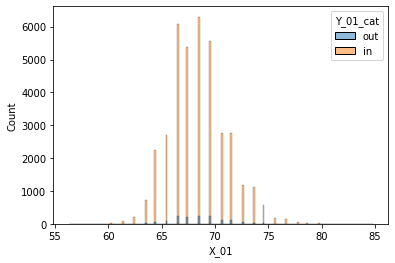

In [ ]:
sns.histplot(data=train_df, x='X_01', hue='Y_01_cat')


# EDA

In [ ]:
train_df.head()

In [ ]:
train_df['X_04'].value_counts()

In [ ]:
test_df['X_04'].value_counts()

In [ ]:
for col in train_df.columns:
    if train_df[col].nunique()==1:
        print(col)

In [ ]:
for col in test_df.columns:
    if test_df[col].nunique()==1:
        print(col)

In [ ]:
target_cols = ['Y_' + str(i).zfill(2) for i in range(1, 15)]
target_cols

# X_1, 2, 5, 6
PCB 체결 시 단계별 누름량

In [ ]:
pcb = ['X_' + str(i).zfill(2) for i in [1, 2, 5, 6]]
pcb

In [ ]:
for col in pcb:
    sns.histplot(data=train_df, x=col)
    plt.show()

In [ ]:
train_df[pcb + target_cols].corr()

In [ ]:
sns.heatmap(train_df[pcb + target_cols].corr())

In [ ]:
sns.pairplot(train_df[pcb + target_cols[:7]].sample(1000))

In [ ]:
sns.pairplot(train_df[pcb + target_cols[7:]].sample(1000))

In [ ]:
train_df['Y_03'].hist()

# X_3, 10, 11, 7, 8, 9
방열 재료 무게, 면적

In [ ]:
heat = ['X_' + str(i).zfill(2) for i in [3, 10, 11, 7, 8, 9]]
heat

In [ ]:
for col in heat:
    sns.histplot(data=train_df, x=col)
    plt.show()

In [ ]:
for col in heat:
    sns.histplot(data=test_df, x=col)
    plt.show()

In [ ]:
train_df['X_10'].value_counts()

In [ ]:
test_df['X_10'].value_counts()

In [ ]:
sns.heatmap(train_df[heat + target_cols].corr())

In [ ]:
antena_pad = ['X_' + str(i).zfill(2) for i in range(13, 19)]
antena_pad

In [ ]:
for col in antena_pad:
    sns.histplot(data=train_df, x=col)
    plt.show()

In [ ]:
sns.heatmap(train_df[antena_pad + target_cols].corr())

## Regression Model Fit

In [ ]:
LR = MultiOutputRegressor(LinearRegression()).fit(train_x, train_y)
print('Done.')

## Inference

In [ ]:
test_x = pd.read_csv('./test.csv').drop(columns=['ID'])

In [ ]:
preds = LR.predict(test_x)
print('Done.')

## Submit

In [ ]:
submit = pd.read_csv('./sample_submission.csv')

In [ ]:
for idx, col in enumerate(submit.columns):
    if col=='ID':
        continue
    submit[col] = preds[:,idx-1]
print('Done.')

In [ ]:
submit.to_csv('./submit.csv', index=False)